In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1.导入数据, 数据清理, 预处理(import, clean, pre=procession)

In [2]:
redWine = pd.read_csv("winequality-red.csv", delimiter=";") 
redWine.columns = redWine.columns.str.replace(" ","_")
redWine.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
whiteWine = pd.read_csv("winequality-white.csv", delimiter=";")
whiteWine.columns = whiteWine.columns.str.replace(" ","_")
whiteWine.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
redWine.info()
redWine.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:

whiteWine.info()
whiteWine.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

2. 基本特征(质量分布, ), 粗略的属性-质量相关性(皮尔森相关系数),  

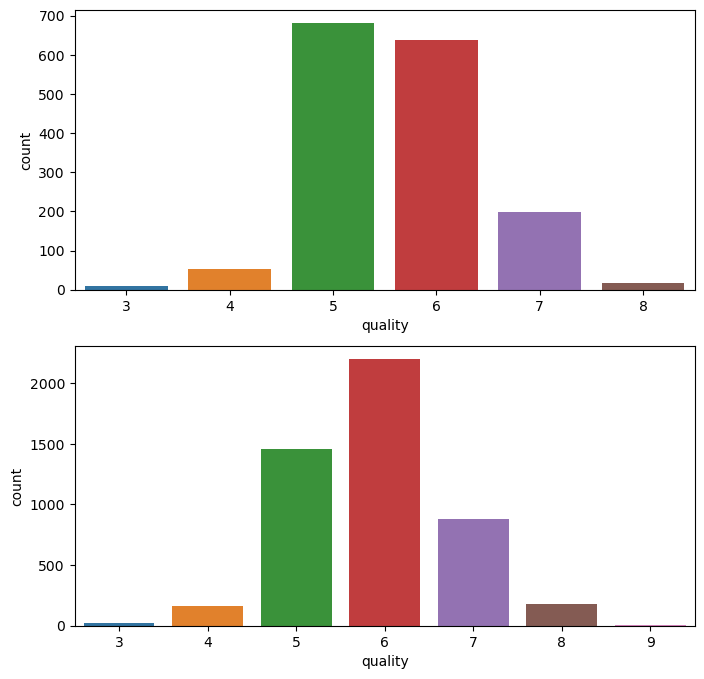

In [7]:
figQ, (ax1, ax2) = plt.subplots(2, 1, figsize = (8, 8))

sns.countplot(redWine['quality'], ax = ax1)
sns.countplot(whiteWine['quality'], ax = ax2)

plt.show()

Q1. Which variable(s) is (are) the most influential one(s) to the quality of the red/white wine?
Q3. Are the influential variables of the red wine the same as those of the white wine?

0.47616632400114156


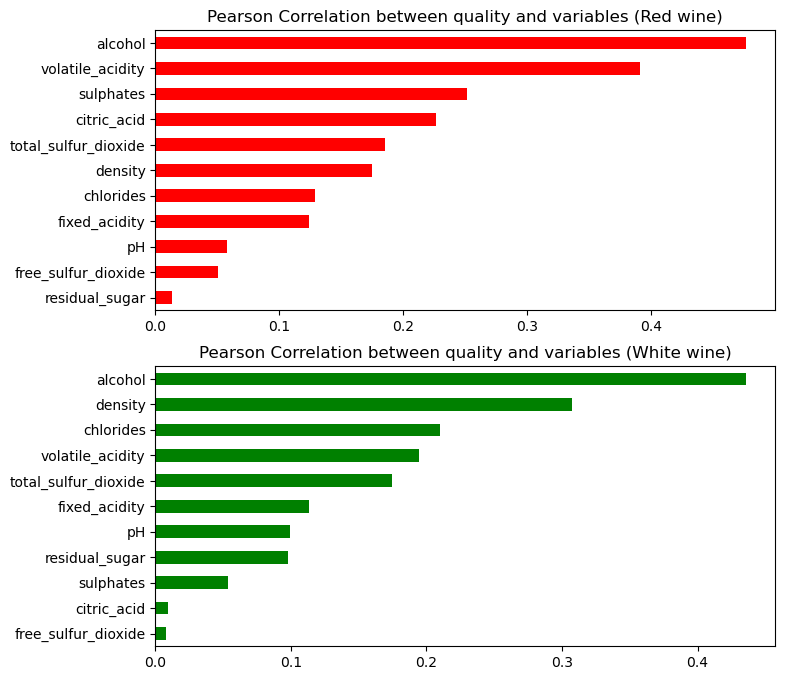

In [8]:
figQCorr, (ax1, ax2) = plt.subplots(2, 1, figsize = (8, 8))
redQcorr = abs(redWine.corr(method='pearson')[
               'quality']).sort_values(ascending=True)[:-1]
whiteQcorr = abs(whiteWine.corr(method ='pearson')['quality']).sort_values(ascending=True)[:-1]
print(redQcorr['alcohol'])

redQcorr.plot(kind='barh', ax=ax1, title='Pearson Correlation between quality and variables (Red wine)', color='red')
whiteQcorr.plot(kind='barh', ax=ax2, title='Pearson Correlation between quality and variables (White wine)', color='green')
#TODO: Export the Quality Corrilation->Slope plot


Q2. Are there any correlations between different variables?

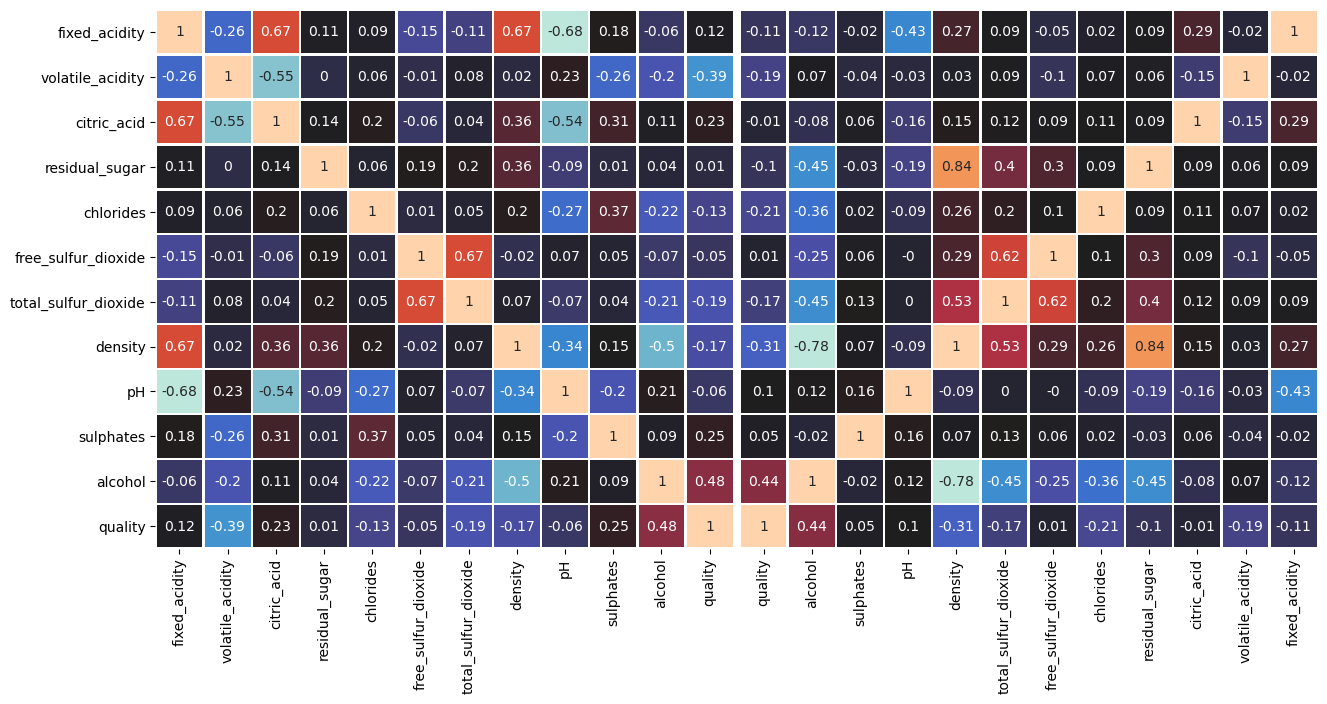

In [9]:
#Correlation 2
redCorr = redWine.corr(method ='pearson')
whiteCorr = whiteWine.corr(method='pearson')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.subplots_adjust(wspace=0.01)

sns.heatmap(redCorr.round(2), cmap="icefire", linewidths=1, ax=ax1, cbar=False, annot=True)
sns.heatmap(whiteCorr.round(2), cmap="icefire", linewidths=1, ax=ax2, cbar=False, annot=True)
ax2.set_yticks([])
ax2.invert_xaxis()
plt.show()



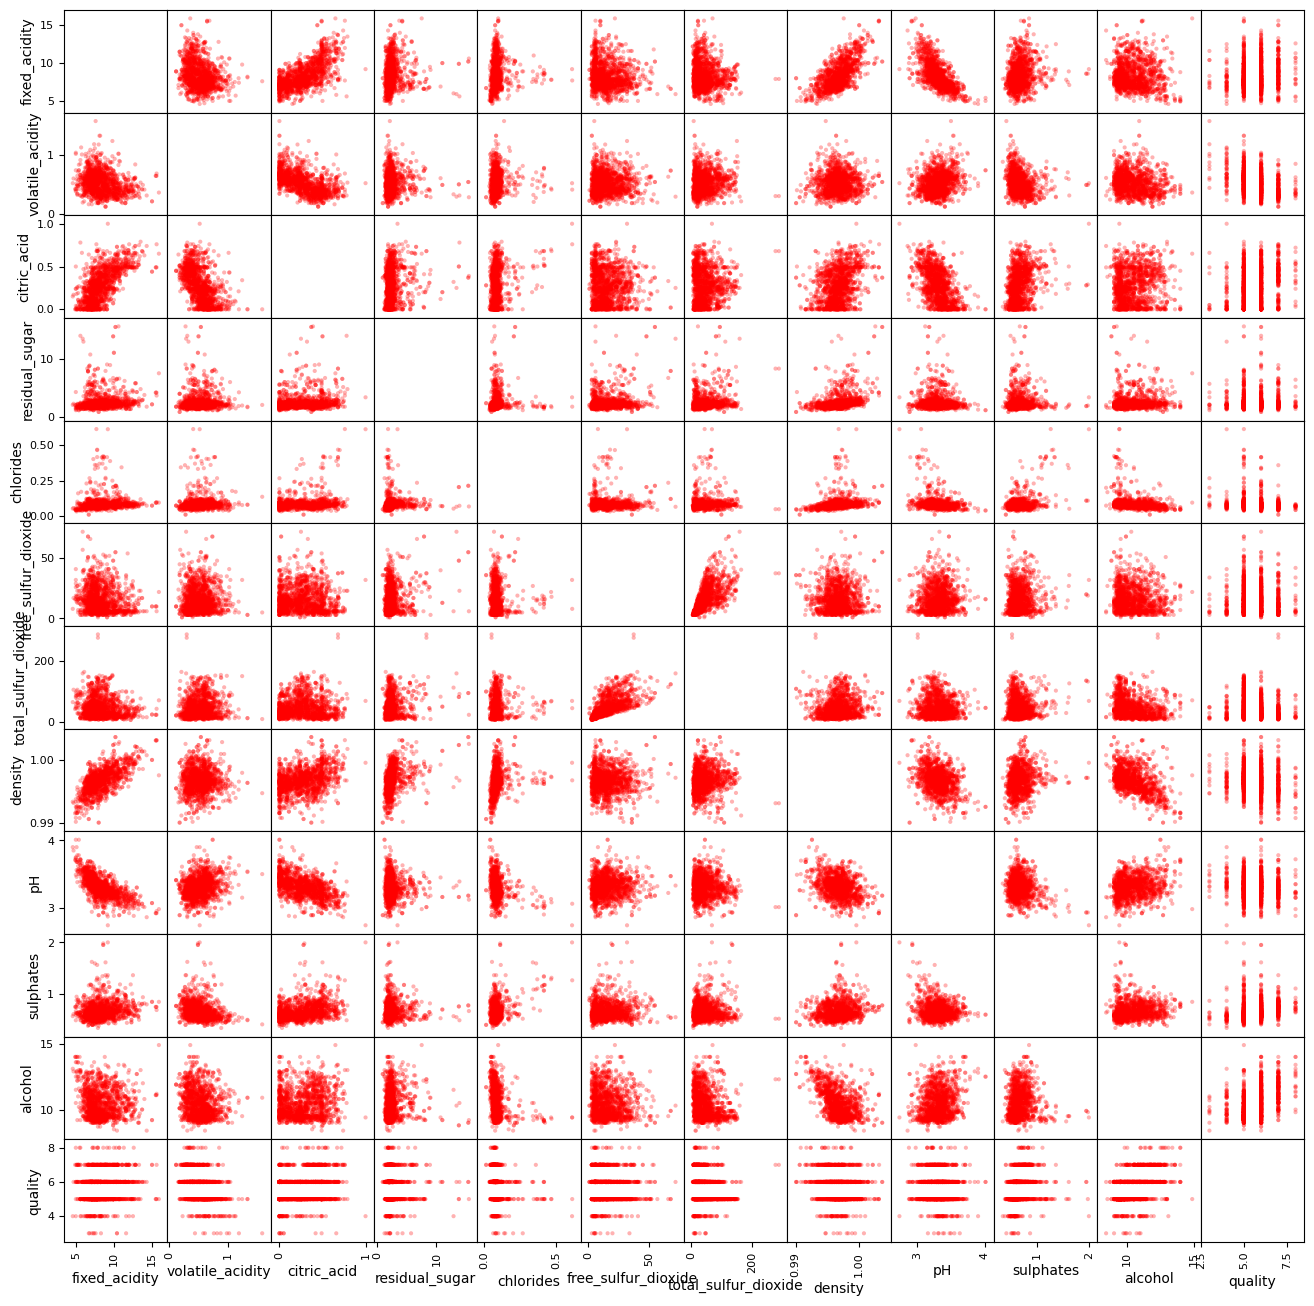

In [10]:
fig2 = pd.plotting.scatter_matrix(redWine, figsize=(16, 16), diagonal='', alpha = 0.3, range_padding=0.2, color='red')


Q1. 对质量影响最大的属性: 分别列出红/白葡萄酒的影响属性, 给出置信度
Q2. 属性间关联: A. 化学上, 酸-pH直接联系, B. Heatmap结果显示
Q3. 

A4-1 决策树预测

In [11]:
redWine.columns


Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

[1,2,3,4,5]: Level 0 (Bad);
[6]: Level 1 (Normal);
[7,8,9]: Level 2 (Good);

In [12]:
xRed = redWine.iloc[:,:-2]
qualityLevel = []
for q in redWine['quality']:
    if q<=5:
        qualityLevel.append(0)
    elif q==6:
        qualityLevel.append(1)
    elif q<=10:
        qualityLevel.append(2)
redWine['qualityLevel']=qualityLevel
yRed = redWine['qualityLevel']
xRed.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56


In [13]:
from collections import Counter
Counter(yRed)


Counter({0: 744, 1: 638, 2: 217})

In [14]:
import sklearn

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xRed = sc.fit_transform(xRed)

In [16]:
xRed

array([[-0.52835961,  0.96187667, -1.39147228, ...,  0.55827446,
         1.28864292, -0.57920652],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.02826077,
        -0.7199333 ,  0.1289504 ],
       [-0.29854743,  1.29706527, -1.18607043, ...,  0.13426351,
        -0.33117661, -0.04808883],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ..., -0.53355375,
         0.70550789,  0.54204194],
       [-1.39015528,  0.65462046, -0.77526673, ..., -0.67665745,
         1.6773996 ,  0.30598963],
       [-1.33270223, -1.21684919,  1.02199944, ..., -0.66605717,
         0.51112954,  0.01092425]])

In [17]:
from sklearn.model_selection import train_test_split
xRedTrain, xRedTest, yRedTrain, yRedTest = train_test_split(xRed, yRed, test_size = 0.3)


A4.1-DecisionTreeClassifier

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

dtRed = DecisionTreeClassifier(class_weight='balanced',max_depth=15)
dtRed.fit(xRedTrain, yRedTrain)
dtRedPredict = dtRed.predict(xRedTest)

dtRedConfMatrix = confusion_matrix(yRedTest, dtRedPredict)
dtRedAccScore = accuracy_score(yRedTest, dtRedPredict)
print(dtRedConfMatrix)
print(dtRedAccScore)


[[169  68  13]
 [ 47  99  29]
 [  2  21  32]]
0.625


A4.2-Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegressionCV

lrRed = LogisticRegressionCV(Cs=5,penalty='l2',
                             class_weight='balanced', multi_class='multinomial')
lrRed.fit(xRedTrain, yRedTrain)
lrRedPredict = lrRed.predict(xRedTest)

lrRedConfMatrix = confusion_matrix(yRedTest, lrRedPredict)
lrRedAccScore = accuracy_score(yRedTest, lrRedPredict)
print(lrRedConfMatrix)
print(lrRedAccScore)


[[172  56  22]
 [ 60  60  55]
 [  1  13  41]]
0.56875


A4.3-RandomForestClassifier

In [20]:
# from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
RFRed = RandomForestClassifier(
    class_weight='balanced', criterion='entropy')
RFRed.fit(xRedTrain, yRedTrain)
RFRedPredict = RFRed.predict(xRedTest)

RFRedConfMatrix = confusion_matrix(yRedTest, RFRedPredict)
RFRedAccScore = accuracy_score(yRedTest, RFRedPredict)
print(RFRedConfMatrix)
print(RFRedAccScore)


[[203  45   2]
 [ 50 115  10]
 [  1  22  32]]
0.7291666666666666


A4.4-SVM

In [21]:
from sklearn.svm import SVC
SVMRed = SVC(C=1.2, gamma=5, class_weight='balanced')
SVMRed.fit(xRedTrain, yRedTrain)
SVMRedPredict = SVMRed.predict(xRedTest)

SVMRedConfMatrix = confusion_matrix(yRedTest, SVMRedPredict)
SVMRedAccScore = accuracy_score(yRedTest, SVMRedPredict)
print(SVMRedConfMatrix)
print(SVMRedAccScore)


[[240  10   0]
 [124  51   0]
 [ 40   2  13]]
0.6333333333333333


A4.5-ExtraTreesClassifier

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
ETRed = ExtraTreesClassifier(
    class_weight='balanced', criterion='entropy')
ETRed.fit(xRedTrain, yRedTrain)
ETRedPredict = ETRed.predict(xRedTest)

ETRedConfMatrix = confusion_matrix(yRedTest, ETRedPredict)
ETRedAccScore = accuracy_score(yRedTest, ETRedPredict)
print(ETRedConfMatrix)
print(ETRedAccScore)


[[203  44   3]
 [ 49 120   6]
 [  2  23  30]]
0.7354166666666667


A4.6-ML

In [23]:
from sklearn.neural_network import MLPClassifier
MLRed = MLPClassifier(hidden_layer_sizes=(10,))
MLRed.fit(xRedTrain, yRedTrain)
MLRedPredict = MLRed.predict(xRedTest)

MLRedConfMatrix = confusion_matrix(yRedTest, MLRedPredict)
MLRedAccScore = accuracy_score(yRedTest, MLRedPredict)
print(MLRedConfMatrix)
print(MLRedAccScore)


[[188  55   7]
 [ 65 100  10]
 [  2  31  22]]
0.6458333333333334


c:\Users\n0t1u\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [24]:
redWine['qualityLevel'].value_counts(normalize=True)


0    0.465291
1    0.398999
2    0.135710
Name: qualityLevel, dtype: float64

Text(0.5, 1.0, 'Models and accuracies in predicting red wine quality')

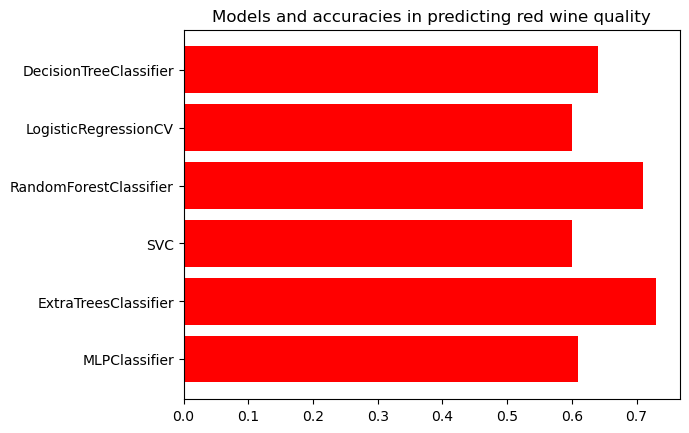

In [25]:
scores = [0.61, 0.73, 0.60, 0.71, 0.60, 0.64]
models = ['MLPClassifier', 'ExtraTreesClassifier',
          'SVC', 'RandomForestClassifier', 'LogisticRegressionCV', 'DecisionTreeClassifier']
plt.barh(models, scores, color='red')
plt.title('Models and accuracies in predicting red wine quality')
